In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
#from skimage.io import imread

In [2]:
dataset = pd.read_csv('./data.csv' , sep= ';')
dataset.head()

,image,species,individual_id,mammal group
0,b555b188c1c0b8.jpg,bottlenose_dolphin,aff93d9d3356,dolphin
1,a58d3efa841662.jpg,common_dolphin,abbeba14a290,dolphin
2,02344653e7eba1.jpg,beluga,d2b9aab4437c,beluga
3,1ea21bda9f93ab.jpg,beluga,a1380153640a,beluga
4,ce31d35d383b8c.jpg,cuviers_beaked_whale,e58594b5e4d5,whale


### Image sample

b555b188c1c0b8.jpg


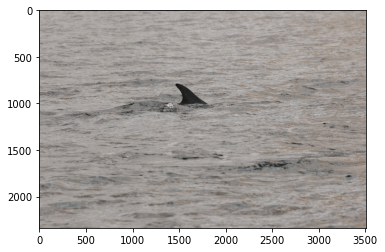

In [15]:
print(dataset['image'][0])
sample_path = './cetaceous_images/' + 'b555b188c1c0b8.jpg'
img_sample = cv2.imread(sample_path)
plt.imshow(img_sample)

In [16]:
blue, green, red = cv2.split(img_sample)
img_sample.shape

(2336, 3504, 3)

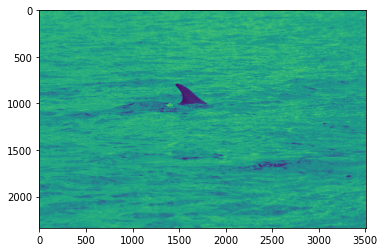

In [17]:
img_sample_bw = cv2.imread(sample_path , flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img_sample_bw)

### Images sizes (color)

In [7]:
image_list = []
for image in dataset['image']:
    path = './cetaceous_images/' + image
    img = cv2.imread(path)
    image_list.append(img)
print(len(image_list))

1500


In [8]:
shapes = []
sizes = []

[shapes.append(img.shape) for img in image_list]
[sizes.append(img.size) for img in image_list]
print(len(set(shapes)))
print(len(set(sizes)))
print(max(shapes) , min(shapes))
print(max(sizes) , min(sizes))


948
947
(4659, 3600, 3) (52, 251, 3)
50317200 39156


In [9]:
# Random crop test
import tensorflow as tf

def cifar_tf_preprocess(inp, size, random_crop=True, random_flip=True, whiten=True,
                        br_sat_con=False):
    image_size = size
    image = inp
    if random_crop:
        image = tf.image.resize_with_crop_or_pad(inp, image_size + 4,
                                                       image_size + 4)
        image = tf.image.random_crop(image, [image_size, image_size, 3])
    if random_flip:
        image = tf.image.random_flip_left_right(image)
    # Brightness/saturation/constrast provides small gains .2%~.5% on cifar.
    if br_sat_con:
        image = tf.image.random_brightness(image, max_delta=63. / 255.)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    if whiten:
        image = tf.image.per_image_standardization(image)
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(52, 52, 3)


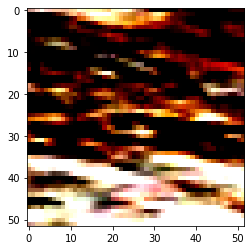

In [10]:
new_img = cifar_tf_preprocess(image_list[0] , 52)
print(new_img.shape)
plt.imshow(new_img)

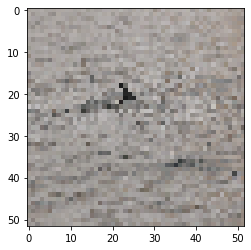

In [11]:
# Reshape (52 x 52)

img_small = cv2.resize(image_list[0], (52 , 52))
plt.imshow(img_small)

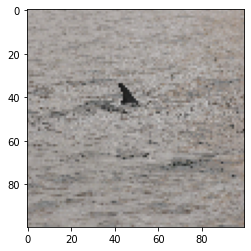

In [13]:
# Reshape (100 x 100)

img_small = cv2.resize(image_list[0], (100 , 100))
plt.imshow(img_small)

sei_whale


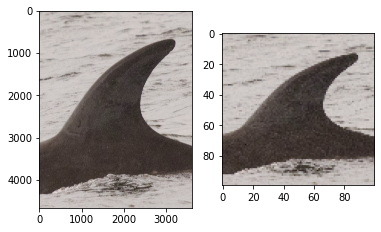

In [12]:
# Reshape (100 x 100) / Se utiliza la imagen de mayor tamaño de la muestra

pos = shapes.index(max(shapes))
print(dataset['species'][pos])
img_small = cv2.resize(image_list[pos], (100 , 100))

plt.subplot(1,2,1)
plt.imshow(image_list[pos])

plt.subplot(1,2,2)
plt.imshow(img_small)

beluga


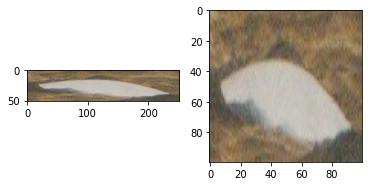

In [14]:
# Reshape (100 x 100) / Se utiliza la imagen de menor tamaño de la muestra

pos = shapes.index(min(shapes))
print(dataset['species'][pos])

img_small = cv2.resize(image_list[pos], (100 , 100))

plt.subplot(1,2,1)
plt.imshow(image_list[pos])

plt.subplot(1,2,2)
plt.imshow(img_small)